<a href="https://colab.research.google.com/github/araujorobert/Projects/blob/main/Predicci%C3%B3n_de_Cancer_mediante_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tumores cancerigenos y Machine Learning
Los algoritmos de clasificación tienen muchas aplicaciones y entre ellas está la predicción de tumores malignos. En esta ocación usaremos el metodo de K vecinos más cercanos para predecir si el tumor de un paciente es benigno o maligno. Teniendo datos historicos de pacientes con tumores usaremos una parte para entrenar al modelo y otra para validarlo. Al final presentaremos la matriz de confusión y la exactitud para ver cuan confiable es nuestro modelo a la hora de usarlo con futuros pacientes.

In [196]:
# Librerias para manejar datos
import pandas as pd
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('seaborn')

# Librerias para hacer Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors

### Descripción del dataset
   A continuación trabajaremos con un dataset que contiene 30 medidas de tumores cancerosos. A continuación se muestra un diccionario resumido de las variables que aparecen.
   -- -----------------------------------------
   1. ID del paciente
   2. Diagnosis ( M = maligno, B = Benigno )
   3. Radio medio
   4. Textura media

etc.

## Exploración y limpieza del dataset


In [166]:
# Importamos las chingaderas
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [167]:
# Dimensión del dataset
print('Dimensión:',data.shape)
print()
print('Tenemos 269 filas y 33 columnas')
print()
# Vemos el tipo de variables
data.dtypes

Dimensión: (569, 33)

Tenemos 269 filas y 33 columnas



id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [168]:
# Vemos si hay nulos
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [169]:
# Variables predictoras y de respuesta
X = data.iloc[:,2:32]
Y = pd.get_dummies(data['diagnosis']).iloc[:,-1]

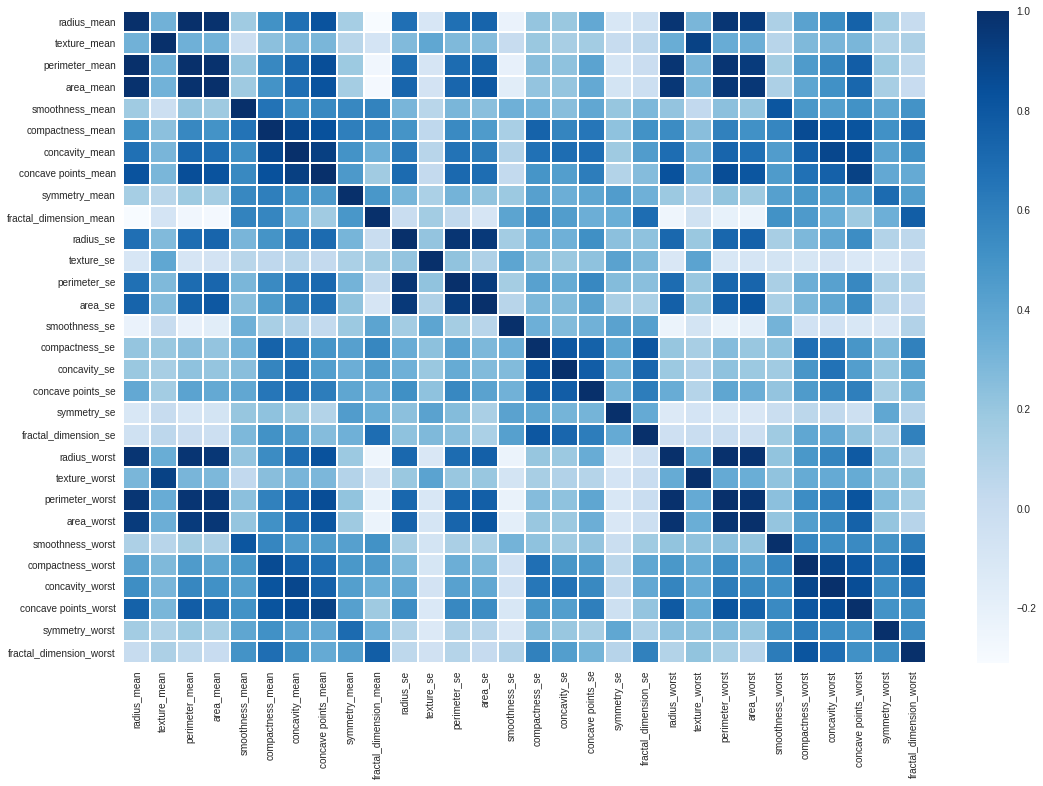

In [194]:
# Analizamos las correlaciones
plt.figure(figsize=(18,12))
sb.heatmap(X.corr(), linewidth=1, cmap='Blues')
plt.show()

Vemos que hay algunas variables altamente correlacionadas, entre ellas estan el radio, el area, la simetria. Lo anterior tiene sentido porque todas estas son propiedades geometricas del tumor deben guardar relación.

## KNN Para predicción de Cancer

In [171]:
# Dividimos en conjunto de entrenamiento y testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [207]:
def KNN(k):
  # Entrenamos el modelo (El numero de vecinos es 5 por defecto)
  model = neighbors.KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,Y_train)

  # Hacemos la predicción con los datos de testing
  Y_pred=model.predict(X_test)

  # Obtenemos la matriz de confusión 
  cm = pd.crosstab(Y_test,Y_pred)

  # Ploteamos los resultados
  plt.figure(figsize=(12,7))
  sb.heatmap(cm, cmap='Blues', fmt='d', annot=True, cbar=False, linewidth=2, linecolor='Black')
  plt.xlabel('Prediction', size=15)
  plt.ylabel('Real', size=15)
  plt.title('Confusion Matrix of Cancer prediction', size=20)
  plt.show()

  print('El reporte:')

  print(classification_report(Y_test,Y_pred))

In [185]:
def accuracy(k):
  # Entrenamos al modelo
  model = neighbors.KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,Y_train)
  # Calculamos el accuracy
  accuracy = model.score(X_test, Y_test)
  return accuracy

### ¿Cúal sera el K optimo?

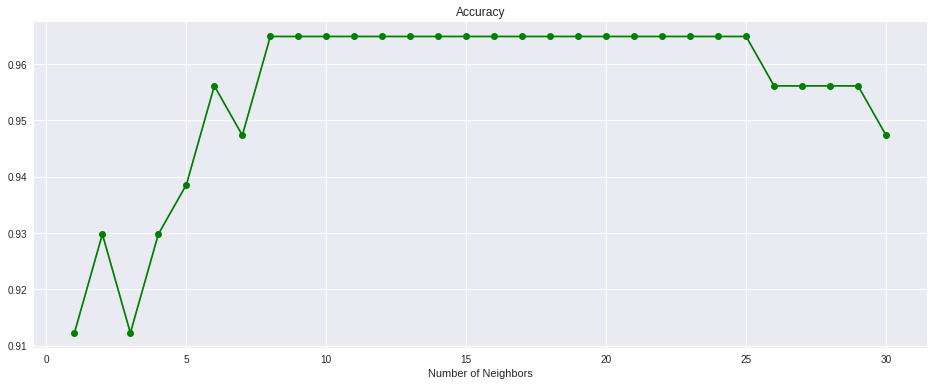

In [210]:
k = np.arange(1,31).tolist()
accura = [ accuracy(i) for i in k ]
plt.figure(figsize=(16,6))
#plt.subplot(1,2,1)
plt.plot(k,accura, marker='o',c='g')
plt.title('Accuracy', size=12)
plt.xlabel('Number of Neighbors')
plt.grid(True)
plt.show()

Para optimizar el accuracy de la predicción debemos tomar un cualquier k entre 8 y 25.

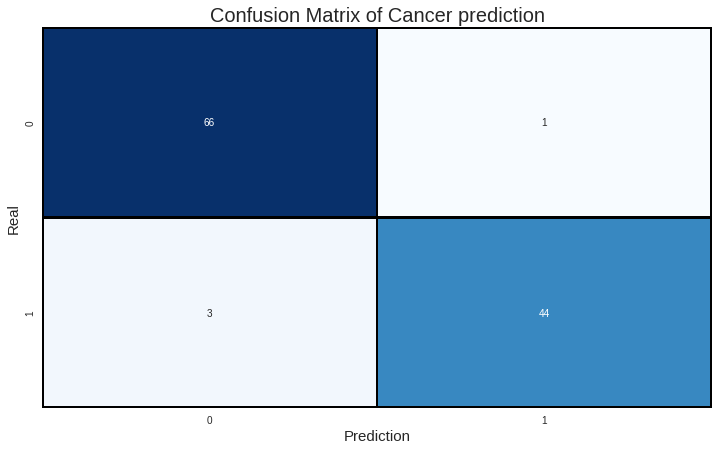

El reporte:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [208]:
# Hacemos la predicción con el k-optimo
KNN(15)

## Conclusión
Entrenamos el modelo de K vecinos más cercanos y lo aplicamos a la predicción de cancer alcanzando una exactitud del 96.5%